In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(r"C:\Users\fzh00\Desktop\文件\excel\阿里天池\银行客户认购预测")

In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [7]:
data = pd.read_csv('train (3).csv')
data.head(2)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22500 non-null  int64  
 1   age               22500 non-null  int64  
 2   job               22500 non-null  object 
 3   marital           22500 non-null  object 
 4   education         22500 non-null  object 
 5   default           22500 non-null  object 
 6   housing           22500 non-null  object 
 7   loan              22500 non-null  object 
 8   contact           22500 non-null  object 
 9   month             22500 non-null  object 
 10  day_of_week       22500 non-null  object 
 11  duration          22500 non-null  int64  
 12  campaign          22500 non-null  int64  
 13  pdays             22500 non-null  int64  
 14  previous          22500 non-null  int64  
 15  poutcome          22500 non-null  object 
 16  emp_var_rate      22500 non-null  float6

In [42]:
data2 = data.drop(['month','day_of_week','id'],axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
for i in data2.columns:
    if data2[i].dtype=='object':
        data2[i]=LabelEncoder().fit_transform(data2[i])
data2.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,51,0,0,5,0,2,2,0,4621,1,112,2,0,1.4,90.81,-35.53,0.69,5219.74,0
1,50,7,1,3,1,2,0,0,4715,1,412,2,1,-1.8,96.33,-40.58,4.05,4974.79,1


<AxesSubplot: >

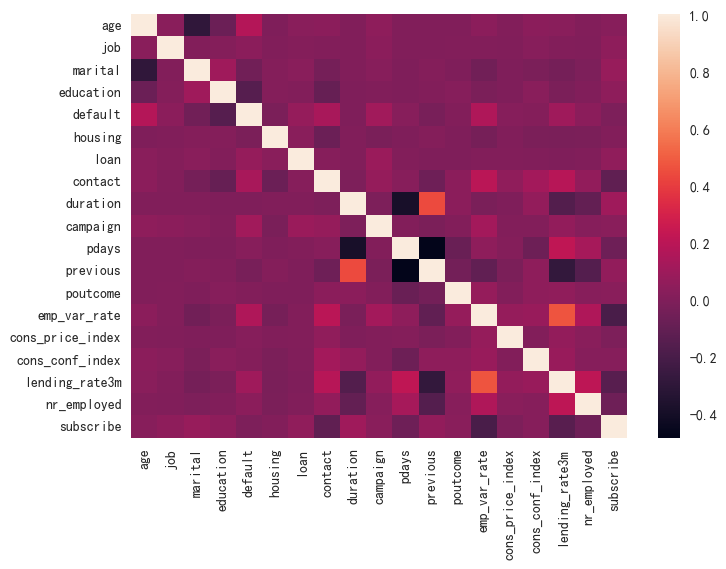

In [23]:
sns.heatmap(data2.corr(method='kendall'))

In [25]:
from sklearn.model_selection import train_test_split
y = data2.pop('subscribe')
xtrain,xtest,ytrain,ytest = train_test_split(data_prepared,Y.values,stratify=y)

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(data_prepared,Y.values,stratify=y)

In [64]:
from sklearn.linear_model import LogisticRegression
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report # 用于分类报告
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
print(classification_report(ytest, LR.predict(xtest)))
# data_prepared, Y.values

LogisticRegression()

              precision    recall  f1-score   support

          no       0.87      0.99      0.93      4887
         yes       0.49      0.06      0.11       738

    accuracy                           0.87      5625
   macro avg       0.68      0.53      0.52      5625
weighted avg       0.83      0.87      0.82      5625



In [54]:
LR = LogisticRegression()
LR.fit(data_prepared, Y.values)
print(classification_report(Y.values, LR.predict(data_prepared)))

LogisticRegression()

              precision    recall  f1-score   support

          no       0.88      0.99      0.93     19548
         yes       0.54      0.08      0.14      2952

    accuracy                           0.87     22500
   macro avg       0.71      0.53      0.53     22500
weighted avg       0.83      0.87      0.83     22500



In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
print(classification_report(ytest, knn.predict(xtest)))

KNeighborsClassifier()

              precision    recall  f1-score   support

          no       0.89      0.96      0.92      4887
         yes       0.45      0.20      0.27       738

    accuracy                           0.86      5625
   macro avg       0.67      0.58      0.60      5625
weighted avg       0.83      0.86      0.84      5625



In [56]:
knn = KNeighborsClassifier()
knn.fit(data_prepared,Y.values)
print(classification_report(Y.values, knn.predict(data_prepared)))

KNeighborsClassifier()

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     19548
         yes       0.69      0.28      0.39      2952

    accuracy                           0.89     22500
   macro avg       0.79      0.63      0.67     22500
weighted avg       0.87      0.89      0.87     22500



In [66]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(xtrain,ytrain)
print(classification_report(ytest, svc.predict(xtest)))

LinearSVC()

              precision    recall  f1-score   support

          no       0.87      1.00      0.93      4887
         yes       0.46      0.02      0.03       738

    accuracy                           0.87      5625
   macro avg       0.67      0.51      0.48      5625
weighted avg       0.82      0.87      0.81      5625



In [57]:
svc = LinearSVC()
svc.fit(data_prepared,Y.values)
print(classification_report(Y.values, svc.predict(data_prepared)))

LinearSVC()

              precision    recall  f1-score   support

          no       0.87      1.00      0.93     19548
         yes       0.47      0.01      0.02      2952

    accuracy                           0.87     22500
   macro avg       0.67      0.50      0.47     22500
weighted avg       0.82      0.87      0.81     22500



In [67]:
from sklearn.naive_bayes import GaussianNB
bay = GaussianNB()
bay.fit(xtrain,ytrain)
print(classification_report(ytest, bay.predict(xtest)))

GaussianNB()

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      4887
         yes       0.40      0.46      0.43       738

    accuracy                           0.84      5625
   macro avg       0.66      0.68      0.67      5625
weighted avg       0.85      0.84      0.84      5625



In [59]:
bay = GaussianNB()
bay.fit(data_prepared,Y.values)
print(classification_report(Y.values, bay.predict(data_prepared)))

GaussianNB()

              precision    recall  f1-score   support

          no       0.91      0.89      0.90     19548
         yes       0.38      0.45      0.41      2952

    accuracy                           0.83     22500
   macro avg       0.65      0.67      0.66     22500
weighted avg       0.84      0.83      0.84     22500



In [69]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
print(classification_report(ytest, DT.predict(xtest)))

DecisionTreeClassifier()

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      4887
         yes       0.41      0.45      0.43       738

    accuracy                           0.84      5625
   macro avg       0.66      0.68      0.67      5625
weighted avg       0.85      0.84      0.85      5625



In [60]:
DT = tree.DecisionTreeClassifier()
DT.fit(data_prepared,Y.values)
print(classification_report(Y.values, DT.predict(data_prepared)))

DecisionTreeClassifier()

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     19548
         yes       1.00      1.00      1.00      2952

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



In [70]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True)
RF.fit(xtrain,ytrain)
print(classification_report(ytest, RF.predict(xtest)))

RandomForestClassifier(oob_score=True)

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      4887
         yes       0.67      0.26      0.38       738

    accuracy                           0.89      5625
   macro avg       0.78      0.62      0.66      5625
weighted avg       0.87      0.89      0.86      5625



In [61]:
RF = RandomForestClassifier(oob_score=True)
RF.fit(data_prepared,Y.values)
print(classification_report(Y.values, RF.predict(data_prepared)))

RandomForestClassifier(oob_score=True)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     19548
         yes       1.00      1.00      1.00      2952

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



In [71]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(num_leaves=1000,n_estimators=200)
LGBM.fit(xtrain,ytrain)
print(classification_report(ytest, LGBM.predict(xtest)))

LGBMClassifier(n_estimators=200, num_leaves=1000)

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      4887
         yes       0.60      0.34      0.43       738

    accuracy                           0.88      5625
   macro avg       0.76      0.65      0.68      5625
weighted avg       0.87      0.88      0.87      5625



In [62]:
LGBM = LGBMClassifier(num_leaves=1000,n_estimators=200)
LGBM.fit(data_prepared,Y.values)
print(classification_report(Y.values, LGBM.predict(data_prepared)))

LGBMClassifier(n_estimators=200, num_leaves=1000)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     19548
         yes       1.00      1.00      1.00      2952

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

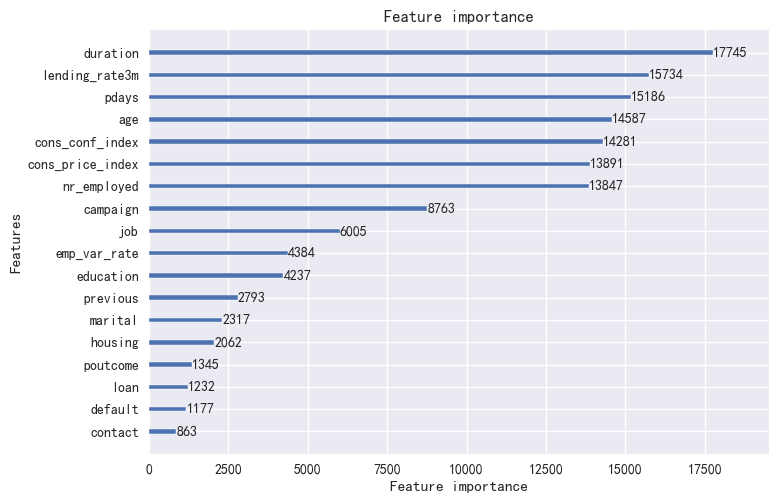

In [47]:
from lightgbm import plot_importance
#model_lgb.feature_importances_
plot_importance(LGBM)

In [48]:
xtrain.shape
xtest.shape

(16875, 18)

(5625, 18)

In [33]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
print(classification_report(ytest, xgb.predict(xtest)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4887
           1       0.58      0.33      0.42       738

    accuracy                           0.88      5625
   macro avg       0.74      0.65      0.68      5625
weighted avg       0.86      0.88      0.87      5625



In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
print(classification_report(ytest, ada.predict(xtest)))

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4887
           1       0.55      0.24      0.33       738

    accuracy                           0.87      5625
   macro avg       0.72      0.60      0.63      5625
weighted avg       0.85      0.87      0.85      5625



In [72]:
from sklearn.neural_network import MLPClassifier   #导入多层感知器
mlp= MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu',)
mlp.fit(xtrain,ytrain)
print(classification_report(ytest, mlp.predict(xtest)))

MLPClassifier(hidden_layer_sizes=(50, 25))

              precision    recall  f1-score   support

          no       0.88      0.99      0.93      4887
         yes       0.55      0.07      0.12       738

    accuracy                           0.87      5625
   macro avg       0.71      0.53      0.53      5625
weighted avg       0.83      0.87      0.82      5625



In [38]:
# 网格搜索调参
from sklearn.model_selection import GridSearchCV
# 参数字典 np.linspace(100,160,4),会产生小数，分别是起、止、个数
param = {'n_estimators':np.arange(50,120,30),
         'max_depth':[3,5,7,9],
         'subsample':[0.8,0.85,0.9,0.95,1],
         'colsample_bytree':[0.8,0.85,0.9,0.95,1]}
xgb_2 = XGBClassifier()
# 以下cv是3折交叉验证
grid_xgb = GridSearchCV(xgb_2,param,cv=3,n_jobs=8)
grid_xgb.fit(xtrain,ytrain)
print(classification_report(ytest, grid_xgb.predict(xtest)))

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=8,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9, 0.95, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': array([ 50,  80, 110]),
                         'subsample': [0.8, 0.85, 0.9, 0.95, 1]})

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4887
           1       0.59      0.25      0.35       738

    accuracy                           0.88      5625
   macro avg       0.74      0.61      0.64      5625
weighted avg       0.86      0.88      0.86      5625



In [44]:
from autogluon.tabular import TabularDataset,TabularPredictor
train_data=TabularDataset(data2)
TP=TabularPredictor(label='subscribe').fit(train_data)
print(classification_report(train_data['subscribe'], TP.predict(train_data)))

No path specified. Models will be saved in: "AutogluonModels\ag-20230502_143933\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230502_143933\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    22500
Train Data Columns: 18
Label Column: subscribe
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['no', 'yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = yes, class 0 = no
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (yes) vs negative (no) class.
	To explicitly set the positive_class, 

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     19548
         yes       0.77      0.34      0.47      2952

    accuracy                           0.90     22500
   macro avg       0.84      0.66      0.71     22500
weighted avg       0.89      0.90      0.88     22500



In [46]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,51,admin.,divorced,professional.course,no,yes,yes,cellular,4621,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,50,services,married,high.school,unknown,yes,no,cellular,4715,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,48,blue-collar,divorced,basic.9y,no,no,no,cellular,171,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,26,entrepreneur,single,high.school,yes,yes,yes,cellular,359,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,45,admin.,single,university.degree,no,no,no,cellular,3178,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [50]:
Y = data['subscribe']
X = data.drop(['subscribe'], axis=1)
num_attribs  = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_index','cons_conf_index',
                 'lending_rate3m', 'nr_employed']
cat_attribs = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline(
    [('imputer', SimpleImputer(strategy='median'))]
)
full_pipeline  = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_attribs ),
    ("num", num_pipeline ,num_attribs)
])
data_prepared = full_pipeline.fit_transform(X)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=100, high=200),
        'max_features': randint(low=8, high=15),
        'max_depth': randint(low=80, high=90)
    }
forest_clf = RandomForestClassifier(random_state=42,n_jobs=-1)
rnd_search = RandomizedSearchCV(forest_clf, param_distribs, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(data_prepared, Y.values)
print(classification_report(Y.values, TP.predict(data_prepared)))
print(classification_report(train_data['subscribe'], TP.predict(train_data)))

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019761D980D0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019761D9AB60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000197625E2B00>},
                   random_state=42, scoring='accuracy')

TypeError: data must be TabularDataset or pandas.DataFrame or str file path to data

In [52]:
print(classification_report(Y.values, rnd_search.predict(data_prepared)))


              precision    recall  f1-score   support

          no       1.00      1.00      1.00     19548
         yes       1.00      1.00      1.00      2952

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500



ValueError: X has 18 features, but RandomForestClassifier is expecting 60 features as input.

In [73]:
print(classification_report(ytest, rnd_search.predict(xtest)))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4887
         yes       1.00      1.00      1.00       738

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [53]:
test = pd.read_csv('test (2).csv')
test_data = full_pipeline.fit_transform(test)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
14605,50,0,1,6,1,2,0,1,2013,3,946,5,1,1.4,97.01,-26.49,1.97,5206.28
6747,47,10,1,6,0,0,0,0,276,2,1036,0,1,1.4,93.91,-44.83,4.97,5149.67
5874,40,7,1,3,0,0,0,1,893,2,446,4,2,1.1,96.96,-46.09,3.78,5001.10
17857,30,2,0,1,0,0,2,0,154,1,1032,1,0,-1.8,88.34,-46.70,1.37,4915.53
3368,46,0,0,6,1,0,0,0,627,0,999,0,1,1.4,95.89,-42.61,5.19,4982.37


In [75]:
randint(low=8, high=15)

scipy.stats._distn_infrastructure.rv_discrete_frozen